In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import nltk
import string
import re
import os
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [2]:
os.getcwd()

'C:\\Users\\91749\\Learning machine learning'

In [3]:
os.chdir('E:\My needs\Machine learing folder')

In [4]:
data = pd.read_csv('train_twitter.csv')
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:
def rem_inp(pattern , input_text):
    rm = re.findall(pattern, input_text)
    for wrd in rm:
        input_text = re.sub(wrd , "" , input_text)
    return input_text

In [6]:
data['Cleaned'] = np.vectorize(rem_inp)("@[\w]*",data['tweet'])

In [7]:
data.head()

,id,label,tweet,Cleaned
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [8]:
data["Cleaned"] = data["Cleaned"].str.replace('[^a-zA-Z#]'," ")

In [9]:
data['Cleaned'][3]

'#model   i love u take with u all the time in ur                                      '

In [10]:
data["Cleaned"] = data["Cleaned"].apply(lambda x : " ".join([w for w in x.split() if len(w) > 2]))
data.head()

,id,label,tweet,Cleaned
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional and selfish drags hi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit can use cause they don...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with all the time
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


## Other way round

In [11]:
word = nltk.word_tokenize("This is a big ball")
for w in  word:
    if len(w) < 2:
        word.remove(w)

word
' '.join(word)

'This is big ball'

In [12]:
tokenize_word = data["Cleaned"].apply(lambda x : x.split() )
tokenize_word

0        [when, father, dysfunctional, and, selfish, dr...
1        [thanks, for, #lyft, credit, can, use, cause, ...
2                                  [bihday, your, majesty]
3               [#model, love, take, with, all, the, time]
4                  [factsguide, society, now, #motivation]
                               ...                        
31957                              [ate, isz, that, youuu]
31958    [see, nina, turner, the, airwaves, trying, wra...
31959    [listening, sad, songs, monday, morning, otw, ...
31960    [#sikh, #temple, vandalised, #calgary, #wso, c...
31961                       [thank, you, for, you, follow]
Name: Cleaned, Length: 31962, dtype: object

In [13]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

tokenize_word = tokenize_word.apply(lambda sen : [stemmer.stem(words) for words in sen])
tokenize_word.head()

0    [when, father, dysfunct, and, selfish, drag, h...
1    [thank, for, #lyft, credit, can, use, caus, th...
2                              [bihday, your, majesti]
3           [#model, love, take, with, all, the, time]
4                    [factsguid, societi, now, #motiv]
Name: Cleaned, dtype: object

In [14]:
for i in range(len(tokenize_word)):
    tokenize_word[i] = " ".join(tokenize_word[i])

data["Cleaned"] = tokenize_word
data.head()    

,id,label,tweet,Cleaned
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct and selfish drag hi kid i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank for #lyft credit can use caus they don o...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with all the time
4,5,0,factsguide: society now #motivation,factsguid societi now #motiv


In [15]:
# pip install wordcloud

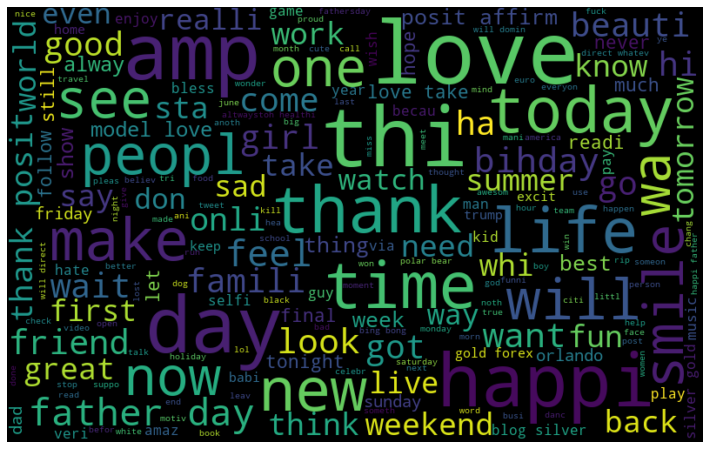

In [16]:
all_word = " ".join([sentence for sentence in data["Cleaned"]])

from wordcloud import WordCloud

word_cloud = WordCloud(width = 800 , height = 500 , random_state = 42 , max_font_size = 100).generate(all_word)

plt.figure(figsize=(16,8))
plt.imshow(word_cloud , interpolation= "bilinear")
plt.axis("off")
plt.show()

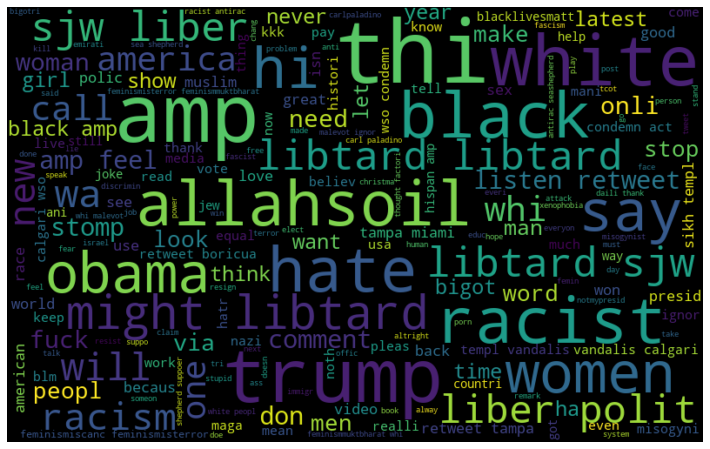

In [17]:
all_word = " ".join([sentence for sentence in data["Cleaned"][data['label']==1]])

word_cloud = WordCloud(width = 800 , height = 500 , random_state = 42 , max_font_size = 100).generate(all_word)

plt.figure(figsize=(16,8))
plt.imshow(word_cloud , interpolation= "bilinear")
plt.axis("off")
plt.show()

In [18]:
def hastag(input_text):
    hash_tag = []
    for tweets in input_text:
        r = re.findall(r'#\w+',tweets)
        hash_tag.append(r)
    return hash_tag

hash_pos = hastag(data["Cleaned"][data["label"]==0])
hash_neg = hastag(data["Cleaned"][data["label"]==1])
    

In [22]:
hash_neg[:5]

[['#cnn', '#michigan', '#tcot'],
 ['#australia',
  '#opkillingbay',
  '#seashepherd',
  '#helpcovedolphin',
  '#thecov',
  '#helpcovedolphin'],
 [],
 [],
 ['#neverump', '#xenophobia']]

In [23]:
hash_pos = sum(hash_pos , [])
hash_neg = sum(hash_neg , [])

In [24]:
hash_neg[:5]

['#cnn', '#michigan', '#tcot', '#australia', '#opkillingbay']

In [35]:
freq_p = nltk.FreqDist(hash_pos)
freq_n = nltk.FreqDist(hash_neg)

In [36]:
d_p = pd.DataFrame({'Hashtag' : list(freq_p.keys()) , 'Count' : list(freq_p.values())})
d_n = pd.DataFrame({'Hashtag' : list(freq_n.keys()) , 'Count' : list(freq_n.values())})

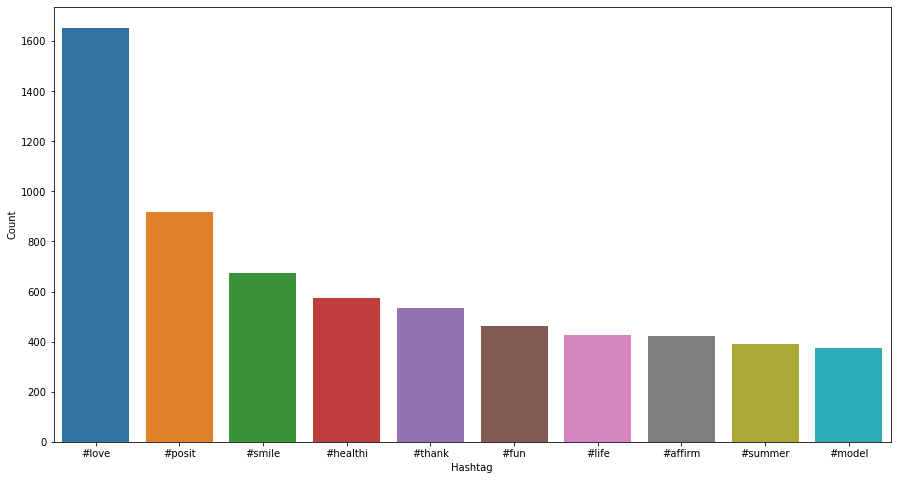

In [42]:
d_p = d_p.nlargest(columns = 'Count' , n = 10)
plt.figure(figsize = (15 , 8))
sns.barplot(data = d_p , x = "Hashtag" , y = "Count")
plt.show()

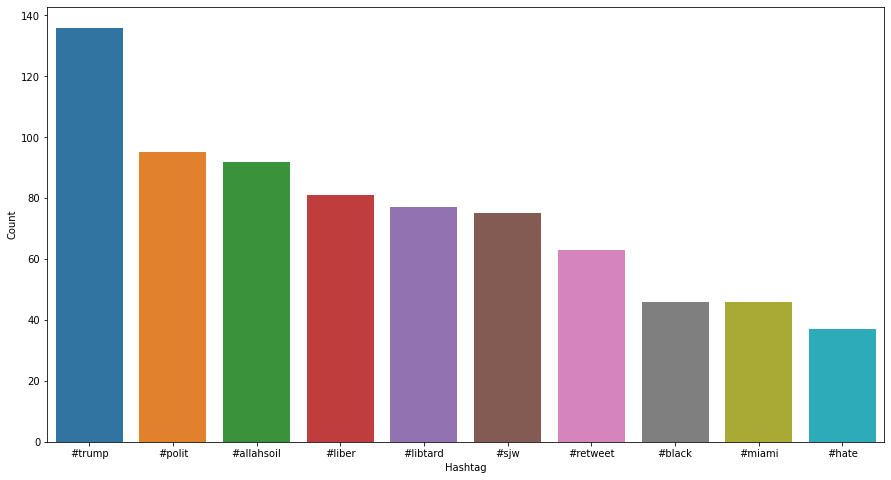

In [43]:
d_n = d_n.nlargest(columns = 'Count' , n = 10)
plt.figure(figsize = (15 , 8))
sns.barplot(data = d_n , x = "Hashtag" , y = "Count")
plt.show()

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vec = CountVectorizer(max_df = 0.9 , min_df = 2 , max_features = 1000 , stop_words = 'english')
bow = bow_vec.fit_transform(data["Cleaned"])

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import f1_score , accuracy_score

X_train , X_test , Y_train , Y_test = train_test_split(bow , data["label"] , random_state = 42 ,test_size = 0.3)

In [57]:
model = LogisticRegression()
model.fit(X_train , Y_train)
pred  = model.predict(X_test)

In [58]:
f1_score(Y_test ,pred)

0.48823529411764716

In [60]:
accuracy_score(Y_test ,pred)

0.9455626238398165